In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset_train = pd.read_csv('./data/BTC-USD.csv')
training_set = dataset_train.iloc[:-60, 1:2].values # Only open


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train = []
y_train = []
for i in range(60, len(training_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#        <--- axis 1 --->   axis 2          axis 1 -> rows 
# X_train 60th - ith date in col 0          axis 2 -> cols
# y_train is ith date

In [6]:
"""
X_train reshape process
requires 3d data for lstm
1) batch_size -> np.shape[0]
2) timesteps or lookback -> np.shape[1]
3) input dimension -> 1 because time series data so 1d data 

This reshape converts 2d -> 3d 
"""

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Bidirectional
from keras.layers import  Conv1D, MaxPooling1D, LSTM,  Dense, Dropout, Flatten

In [8]:

model = Sequential()

# CNN

model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))

# LSTM

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2)) # Dropout 20% of neurons

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.1))

model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.1))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# X_train is 3d data, y_train is 1d data 
model.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
8/8 [==============================] - 14s 60ms/step - loss: 0.0846
Epoch 2/150
8/8 [==============================] - 0s 34ms/step - loss: 0.0281
Epoch 3/150
8/8 [==============================] - 0s 31ms/step - loss: 0.0198
Epoch 4/150
8/8 [==============================] - 0s 37ms/step - loss: 0.0150
Epoch 5/150
8/8 [==============================] - 0s 33ms/step - loss: 0.0141
Epoch 6/150
8/8 [==============================] - 0s 30ms/step - loss: 0.0112
Epoch 7/150
8/8 [==============================] - 0s 38ms/step - loss: 0.0116
Epoch 8/150
8/8 [==============================] - 0s 38ms/step - loss: 0.0100
Epoch 9/150
8/8 [==============================] - 0s 38ms/step - loss: 0.0083
Epoch 10/150
8/8 [==============================] - 0s 40ms/step - loss: 0.0076
Epoch 11/150
8/8 [==============================] - 0s 31ms/step - loss: 0.0076
Epoch 12/150
8/8 [==============================] - 0s 31ms/step - loss: 0.0068
Epoch 13/150
8/8 [==============================

In [10]:
dataset_test = dataset_train.iloc[-240:, 1:2] # Prev -20 for 1 month 
real_stock_price = dataset_test.values
len(real_stock_price)

240

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # horizontal concatenation 1 vertical is 0 -> cols
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

# for 1 month

# for i in range(60, 80):
#     X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# predicted_stock_price = model.predict(X_test)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# predicted_stock_price

# Actual Ends

for i in range(60, 300): # for 6 months
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

NameError: name 'dataset_test' is not defined

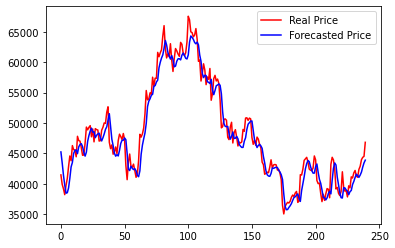

In [12]:
plt.plot(real_stock_price, color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Forecasted Price')
# plt.title('Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import numpy as np

# Calculate the MAE of the predictions
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

# Calculate the MSE of the predictions
mse = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate the RMSE of the predictions
rmse = np.sqrt(mse)

# Calculate the R^2 of the predictions
r2 = r2_score(real_stock_price, predicted_stock_price)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 1547.5396972937497
Mean Squared Error: 3955926.1828216673
Root Mean Squared Error: 1988.9510257474083
R-squared: 0.9371903819950155
